# Single Layer Neural Networks are just Linear and Logistic Regression
The single layer network can be summarized with the notation given by the following representation:
![SingleLayerNetwork](PDF_Slides/SingleLayerNetwork.png)

When we calculated objective functions for linear regression and logistic regression we used the maximum likelihood priciple, showing that (under Gaussian noise) this led to minimizing the squared error of the output.

This is identical to the objective function for generic, single layer neural networks:
$$ \sum_i^M (\mathbf{y}^{(i)}-\mathbf{\hat{y}}^{(i)})^2 $$

Here, the $\mathbf{y}^{(i)}$ is a one-hot-encoded representation of the class for the $i^{th}$ instance.
Adding in terms of single layer neural network explicitly:
$$ J(\mathbf{W}) = \sum_i^M (\mathbf{y}^{(i)}-\phi(\mathbf{W}\cdot \mathbf{x}^{(i)}))^2 $$

Adaline network objective function:
$$ J(\mathbf{W}) = \sum_i^M (\mathbf{y}^{(i)}-\mathbf{W}\cdot \mathbf{x}^{(i)})^2 $$

To solve, we need the gradient:
$$  \nabla J(\mathbf{W}) $$

And then we can use the Widrow-Hoff learning Rule:
$$ \mathbf{W}\leftarrow\mathbf{W} +\eta\nabla J(\mathbf{W}) $$

Which can be separated for each row (they are independent):
$$ \mathbf{w}\leftarrow\mathbf{w} +\eta[ \mathbf{X}*(\mathbf{y}-\mathbf{\hat{y}})] $$

$$ \mathbf{w}_{row}\leftarrow\mathbf{w}_{row} +\eta[ \mathbf{X}*(\mathbf{y}_{row}-\mathbf{\hat{y}}_{row})] $$

The same is true for the update equation of the perceptron with a sigmoid activation function:
$$ \mathbf{w}\leftarrow\mathbf{w} +\eta[ \mathbf{X}*(\mathbf{y}-\mathbf{g(x)})] $$

$$ \mathbf{w}_{row}\leftarrow\mathbf{w}_{row} +\eta[ \mathbf{X}*(\mathbf{y}_{row}-\mathbf{g(x)}_{row})] $$

This means that the update equations are identical to the case of linear and logistic regression, using one-versus-all! So all of this we have already looked at and solved! Yay!! But, what about when we add more layers?


## Multi-layer Case
In the multilayer perceptron, we need to adjust some notation:
![MultiLayerNetwork](PDF_Slides/MultiLayerNetwork.png)

### Formulation of multi-layer perceptron
Our objective function becomes:
$$ J(\mathbf{W}) = \sum_k^M (\mathbf{y}^{(k)}-\mathbf{a}^{(L)})^2 $$

And the update equation becomes:
$$  w_{i,j}^{(l)} \leftarrow w_{i,j}^{(l)} - \eta \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}}$$

However, this is not tractable to compute by hand for each network architecture, so we expand the gradient calculation using the chain rule to get partial derivatives:
$$  \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} \frac{\partial\mathbf{z}^{(l)}}{\partial w_{i,j}^{(l)}}   $$

The second term in the partial derivatives is easy to calculate as $a_j^{(l)}$ (see lecture notes), such that:
$$  \frac{\partial J(\mathbf{W})}{\partial w_{i,j}^{(l)}} = \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} a_j^{(l)}   $$

And our update equation would be:
$$  w_{i,j}^{(l)} \leftarrow w_{i,j}^{(l)} - \eta \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} a_j^{(l)}$$

To calculate the other term, we need to continue to use the chain rule:
$$ \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} =  \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l+1)}} \frac{\partial \mathbf{z}^{(l+1)} }{\partial\mathbf{z}^{(l)}} $$

After some derivation, we can see that: 
$$ \frac{\partial \mathbf{z}^{(l+1)} }{\partial\mathbf{z}^{(l)}} = \text{diag}[\mathbf{a}^{(l+1)}*(1-\mathbf{a}^{(l+1)})] \cdot\mathbf{W}^{(l+1)}  $$

and
$$ \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}} = \text{diag}[\mathbf{a}^{(l+1)}*(1-\mathbf{a}^{(l+1)})] \cdot\mathbf{W}^{(l+1)} \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l+1)}} $$

This set up a recurrence relation such that if we know $\frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(l)}}$ for the final layer, we can use it to get the derivatives for the previous layers. For a two layer network, the final layer gradient can be formulated as:
$$  \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(2)}} = \frac{\partial}{\partial\mathbf{z}^{(2)}} (\mathbf{y}^{(k)}-\phi(\mathbf{z}^{(2)}))^2 $$

$$  \frac{\partial J(\mathbf{W})}{\partial\mathbf{z}^{(2)}}  = -2(\mathbf{y}^{(k)}-\mathbf{a}^{(3)})*\mathbf{a}^{(3)}*(1-\mathbf{a}^{(3)}) $$

where $\mathbf{y}^{(k)}$ is the $k^{th}$ instance and $\mathbf{a}^{(3)})$ is the feedforward result for the $k^{th}$ instance. We can make this more explicit by writing the $k^{th}$ instance of $\mathbf{a}^{(3)}$ as $_k\mathbf{a}^{(3)})$. Now the update becomes:

$$  \frac{\partial J(\mathbf{W})}{\partial _k\mathbf{z}^{(2)}}  = -2(\mathbf{y}^{(k)}-{_k\mathbf{a}^{(3)}})*{_k\mathbf{a}^{(3)}}*(1-{_k\mathbf{a}^{(3)}}) $$

Also recall that $\cdot$ represent matrix multiplication and $*$ represents elementwise or row-wise multiplication. The update equation can be given by:

$$ \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} -\eta \frac{\partial J(\mathbf{W}^{(l)})}{\partial _k\mathbf{z}^{(l)}} \cdot {_k\mathbf{a}^{(l)}} $$

For stochastic gradient descent. Or can be given by the following for batch gradient descent:

$$ \mathbf{W}^{(l)} \leftarrow \mathbf{W}^{(l)} -\eta \sum_k\frac{\partial J(\mathbf{W}^{(l)})}{\partial {_k\mathbf{z}^{(l)}}} \cdot {_k\mathbf{a}^{(l)}} $$


## Programming a Two Layer Perceptron


In [57]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.W1, self.W2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        
    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation"""
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output, self.n_hidden + 1)
        return W1, W2
    
    def _sigmoid(self, z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1.0 - sg)
    
    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    def _L2_reg(self, lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.sum(W1[:, 1:] ** 2) +
                                np.sum(W2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, W1, W2):
        """Compute L1-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * (np.abs(W1[:, 1:]).mean() +
                                np.abs(W2[:, 1:]).mean())
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L1_term = self._L1_reg(self.l1, W1, W2)
        L2_term = self._L2_reg(self.l2, W1, W2)
        return cost + L1_term + L2_term

In [58]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step

        Parameters
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1-a3 : activations
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X, how='column')
        Z1 = W1 @ A1.T
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        A1-A3 : activations for all instances
        Z1    : Net input of hidden layer.
        Y_enc : one-hot encoded class labels.
        W1,W2 : Weight matrices 

        Returns
        ---------
        grad1 : Gradient of the weight matrix W1.
        grad2 : Gradient of the weight matrix W2.

        """
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,y) in zip(A1,A2.T,A3.T,Y_enc.T):
            dJ_dz2 = -2*(y - a3)*a3*(1-a3)
            dJ_dz1 = dJ_dz2 @ W2 @ np.diag(a2*(1-a2))
                         
            grad2 += dJ_dz2[:,np.newaxis]  @ a2[np.newaxis,:]
            grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
            # don't incorporate bias term in the z1 gradient (its added later in a2)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (W2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y, self.n_output)

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self

## Getting some data to test with:
Let's start by grabbing some data for a smaller hadn written digits dataset. 

In [59]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

ds = load_digits()
X = ds.data
y = ds.target

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))

(1797, 64)
(1797,)
0.0 16.0


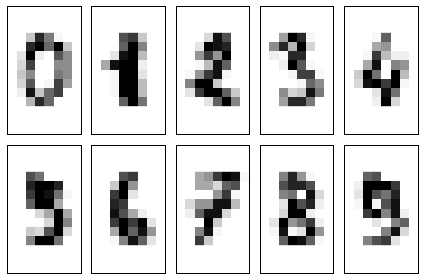

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

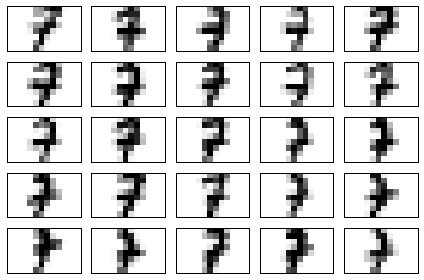

In [61]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
sevens = X[y == 7]
for i in range(25):
    img = sevens[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [62]:
nn = TwoLayerPerceptron(n_output=10, 
                          n_features=X.shape[1], 
                          n_hidden=50, 
                          l2=0.1, # tradeoff L2 regularizer
                          l1=0.0, # tradeoff L1 regularizer
                          epochs=200, # iterations
                          eta=0.001,  # learning rate
                          random_state=1)

In [63]:
%time nn.fit(X, y, print_progress=True)
yhat = nn.predict(X)

Epoch: 200/200

CPU times: user 25.3 s, sys: 322 ms, total: 25.6 s
Wall time: 13.3 s


In [64]:
print('Resubstitution acc:',accuracy_score(y,yhat))

Resubstitution acc: 0.863105175292


___

WOW. That was **sooooo sloooowwwww!** Why?
### Self-Test: Where is our biggest bottle neck?
- A. Feedforward calculation
- B. Number of gradient calculations
- C. `for` loop in gradient
- D. One-hot encoded vector format of Y
___

Also, how did our objective function perform?


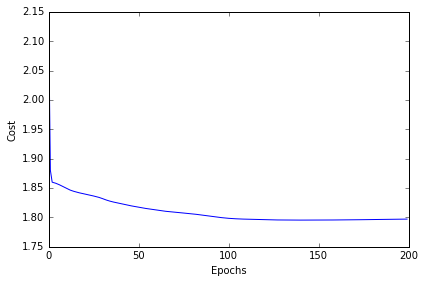

In [67]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## Vectorized coding operations in gradient
So we need to derive equations for vectorized operations. These can be derived by specifically writing out our current gradient calculations. If we plug in the equations for the final layer gradient, we have that:

$$  \Delta_k^{(2)} = -2(\mathbf{y}^{(k)}-{_k\mathbf{a}^{(3)}}){_k\mathbf{a}^{(3)}}(1-{_k\mathbf{a}^{(3)}})\cdot {_k\mathbf{a}^{(2)} } $$

where we use $\Delta_k^{(2)}$ in place of $\frac{\partial J(\mathbf{W}^{(l)})}{\partial _k\mathbf{z}^{(2)}} \cdot {_k\mathbf{a}^{(2)}}$ to simplify the notation. Therefore, the total batch gradient calculation is given by:

$$ \mathbf{\Delta}^{(2)} = \sum_k \Delta_k^{(2)} $$

This first operation is relatively easy to vectorize because each column in $\mathbf{A}^{(2)}$ corresponds to the $k^{th}$ instance of $_k\mathbf{a}^{(2)}$. Therefore we can simply transpose $\mathbf{A}^{(2)}$ and multiply it by the elementwise multiplications of $\mathbf{y}^{(k)}$ and $_k\mathbf{a}^{(3)}$:

$$ \mathbf{\Delta}^{(2)} = -2(\mathbf{Y}-\mathbf{A}^{(3)})*\mathbf{A}^{(3)}*(1-\mathbf{A}^{(3)})\cdot [\mathbf{A}^{(2)}]^T $$

For convenience, we define another variable, $\mathbf{\sigma}^{(2)}$:

$$ \mathbf{\sigma}^{(2)} = -2(\mathbf{Y}-\mathbf{A}^{(3)})*\mathbf{A}^{(3)}*(1-\mathbf{A}^{(3)}) $$

such that:

$$ \mathbf{\Delta}^{(2)} = \mathbf{\sigma}^{(2)}\cdot [\mathbf{A}^{(2)}]^T $$

Further details about this calculation can be found in the lecture notes or `../data/VectorizedBackPropagation.pdf` in this same repository.


___

Similarly, the calculation of the gradient for the hidden layer, from our derivations was:

$$  \Delta_k^{(1)} = \frac{\partial J(\mathbf{W})}{\partial \mathbf{z}^{(2)}}\cdot \mathbf{W}^{(2)} \cdot \text{diag}[{_k\mathbf{a}^{(2)}}*(1-{_k\mathbf{a}^{(2)}})] $$

$$ \mathbf{\Delta}^{(1)} = \sum_k \Delta_k^{(1)} $$

This can also be vectorized by recognizing that $\frac{\partial J(\mathbf{W})}{\partial \mathbf{z}^{(2)}}$ is a matrix with columns equal to $\frac{\partial J(\mathbf{W})}{\partial {_k\mathbf{z}^{(2)}}}$ for each instance $k$. We have already solved for this: $ \mathbf{\sigma}^{(2)} $. With some algebra, we can find that the computation is represented vectorized as:

$$  \mathbf{\Delta}^{(1)} = [\mathbf{W}^{(2)}]^T \cdot \mathbf{\sigma}^{(2)} * \mathbf{A}^{(2)} * (1-\mathbf{A}^{(2)}) \cdot \mathbf{A}^{(1)} $$

And we define an intermediate variable $\mathbf{\sigma}^{(1)}$ as:

$$ \mathbf{\sigma}^{(1)} =  [\mathbf{W}^{(2)}]^T \cdot \mathbf{\sigma}^{(2)} * \mathbf{A}^{(2)} * (1-\mathbf{A}^{(2)}) $$

such that: 

$$  \mathbf{\Delta}^{(1)} = \mathbf{\sigma}^{(1)}\cdot \mathbf{A}^{(1)} $$

Let's get programming! All we really need to do is update the `_get_gradient` class method.

In [68]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1-a3 : activations
        z1    : Net input of hidden layer.
        y_enc : one-hot encoded class labels.
        W1,W2 : Weight matrices 

        Returns
        ---------
        grad1 : Gradient of the weight matrix W1.
        grad2 : Gradient of the weight matrix W2.

        """
        # vectorized backpropagation
        sigma3 = -2*(Y_enc-A3)*A3*(1-A3)
        sigma2 = (W2.T @ sigma3)*A2*(1-A2)
        
        grad1 = sigma2[1:,:] @ A1
        grad2 = sigma3 @ A2.T
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (W2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

In [69]:
nn = TwoLayerPerceptronVectorized(n_output=10, 
                          n_features=X.shape[1], 
                          n_hidden=50, 
                          l2=0.1, # tradeoff L2 regularizer
                          l1=0.0, # tradeoff L1 regularizer
                          epochs=200, # iterations
                          eta=0.001,  # learning rate
                          random_state=1)

%time nn.fit(X, y, print_progress=True)
yhat = nn.predict(X)
print('Resubstitution acc:',accuracy_score(y,yhat))

Epoch: 200/200

CPU times: user 2.07 s, sys: 116 ms, total: 2.19 s
Wall time: 1.2 s
Resubstitution acc: 0.863105175292


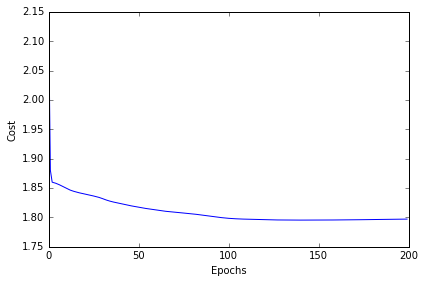

In [71]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## Adding complexity and functionality
So now we can calculate the gradient quickly, but we need to account for more optimization methods in this new space because the optmiization surface can be highly non-convex. We need to steer clear of local optima as best as possible.

To start, let's add some momentum to the calculation and perform mini-batching of the gradient updates to help improve performance. Our new class can inherit from the old one. 

In [72]:
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y, self.n_output)
        

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[idx], Y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2,A3=A3, Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                delta_W1_prev, delta_W2_prev = delta_W1, delta_W2

            self.cost_.append(mini_cost)
            
        return self

In [73]:
nn_mini = TLPVectorizedMiniBatch(n_output=10, 
                          n_features=X.shape[1], 
                          n_hidden=50, 
                          l2=0.1, 
                          l1=0.0, 
                          epochs=50, # iterations
                          eta=0.001,  # gradient update
                          alpha=0.001,# momentum calculation
                          decrease_const=0.0001, # decreasing eta
                          minibatches=50, # minibatch size
                          shuffle=True,
                          random_state=1)

    
%time nn_mini.fit(X, y, print_progress=True)
yhat = nn.predict(X)
print('Resubstitution acc:',accuracy_score(y,yhat))

Epoch: 50/50

CPU times: user 2.1 s, sys: 50.6 ms, total: 2.15 s
Wall time: 1.16 s
Resubstitution acc: 0.863105175292


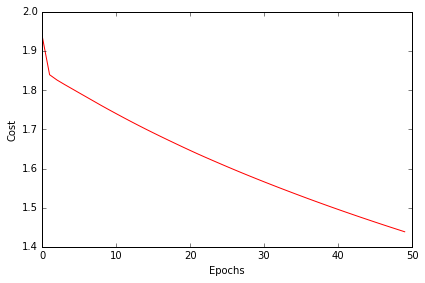

In [74]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

## Using different optimization techniques
While the above implementation is good for a number of applications, we have yet to use more advanced optimization algorithms. Why is that? Shouldn't we remedy this situation?

### Self-test: Should we try quasi-Newton methods on the MLP?
- A. Yes. Quasi-Newton methods converge much faster
- B. Yes. Quasi-Newton methods are guaranteed to find the global optimum
- C. No. There is no gurantee that Quasi-Newton methods will work better in a non-convex space.
- D. No. With so many weights, the Hessian calculation is too complex. 

___

## Quasi-Newton updates for the MLP
Let's try to perform L-BFGS with on the previous models. The easy way of performing this is to add wrapper methods to the `_get_gradient` function in order to pack and unpack the data into the Weights matrices.


In [75]:
from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin_l_bfgs_b
class TLPVectorizedBFGS(TwoLayerPerceptronVectorized):
    
    def __init__(self, gtol=1e-5, **kwds):        
        # need to add to the original initializer 
        self.gtol = gtol
        
        # but keep other keywords
        super().__init__(**kwds)
        
    def _pack(self, in1, in2):
        '''Pack and flatten input vectors '''
        return np.hstack((in1.flatten(),in2.flatten()))
    
    def _unpack(self, in_tot):
        '''Undo packing according to layer weight sizes'''
        out1 = in_tot[:self.W1.size].reshape(self.W1.shape)
        out2 = in_tot[self.W1.size:].reshape(self.W2.shape)
        return out1, out2
    
    def _calc_cost_gradient_packed(self,W,X_data,Y_enc):
        '''Unpack and get cost, gradient for bfgs'''
        W1, W2 = self._unpack(W) 
        # feedforward all instances
        A1, Z1, A2, Z2, A3 = self._feedforward(X_data,W1,W2)
        
        cost = np.sum((Y_enc-A3)**2)
        L1_term = self._L1_reg(self.l1, W1, W2)
        L2_term = self._L2_reg(self.l2, W1, W2)
        cost = cost + L1_term + L2_term
        grad1,grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Y_enc=Y_enc,
                                         W1=W1, W2=W2)
        return cost, self._pack(grad1,grad2)
    
    def _cost_packed(self,W,X_data,Y_enc):
        '''Unpack and calculate MSE for bfgs'''
        W1, W2 = self._unpack(W)
        _, _, _, _, A3 = self._feedforward(X_data,W1,W2)
        return np.sum((Y_enc-A3)**2)
    
    def fit(self,X,y,print_progress=False):
        '''Learn weights from training data'''
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y, self.n_output)
        
        # make initial matrices into single row vector
        W = self._pack(self.W1,self.W2)

        
        if print_progress:
            def callback(xd):
                callback.counter += 1
                sys.stderr.write('\rEpoch: %d/%d (max)' % (callback.counter,callback.epochs))
                sys.stderr.flush()

            callback.counter = 0
            callback.epochs = self.epochs
            
        else:
            callback = None
            
        # compute gradient optimum with bfgs
        W_best,_,props = fmin_l_bfgs_b(
                        x0=W,
                        func=self._calc_cost_gradient_packed,
                        maxfun=self.epochs,
                        callback=callback,
                        pgtol=self.gtol,
                        args=(X_data, Y_enc))
        
        self.W1, self.W2 = self._unpack(W_best)
        if print_progress:
            print(props)
    

In [76]:
nn_bfgs = TLPVectorizedBFGS(n_output=10, 
                          n_features=X.shape[1], 
                          n_hidden=50, 
                          l2=0.1, 
                          l1=0.0, 
                          epochs=50, # iterations
                          eta=0.001,  # gradient update
                          gtol=1e-5,
                          random_state=1)

    
%time nn_bfgs.fit(X, y,print_progress=True)
yhat = nn_bfgs.predict(X)
print('Resubstitution acc:',accuracy_score(y,yhat))

Epoch: 42/50 (max)

{'task': b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT', 'nit': 42, 'warnflag': 1, 'grad': array([  1.11397388e-10,   3.98802983e-02,  -9.17094540e-02, ...,
         9.94193160e-01,  -8.14603916e-02,  -4.32952199e-02]), 'funcalls': 51}
CPU times: user 568 ms, sys: 28.2 ms, total: 597 ms
Wall time: 344 ms
0.94101279911


Wow! That was pretty fast compared to the other implementations we have seen. But don't let this fool you. The L-BFGS implementation is great for smaller datasets, but minibatch/stochastic methods are more optimal as the number of instances in our data gets larger. Eventually they over power the L-BFGS algorithm's ability to move along the curvature effectively and efficiently.  
___
# Using a bigger handwriting dataset

In [77]:
# more data for handwriting recognition?
# Let's use Raschka's implementation for using the mnist dataset:
# https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [78]:
X_train, y_train = load_mnist('data/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('data/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


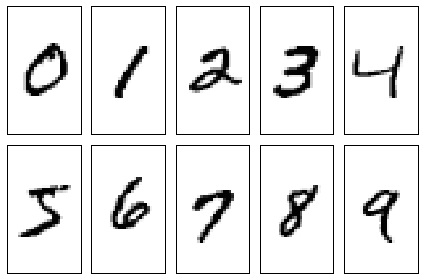

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

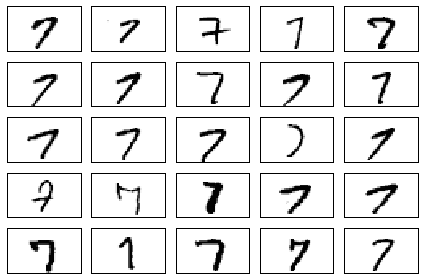

In [80]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
sevens = X_train[y_train == 7]
for i in range(25):
    img = sevens[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### L-BFGS Optimization for MNIST
This is a nice test to show that mini-batching has better conversion properties for some datasets.

In [81]:
nn_bfgs = TLPVectorizedBFGS(n_output=10, 
                      n_features=X_train.shape[1], 
                      n_hidden=50, 
                      l2=0.1, 
                      l1=0.0, 
                      epochs=100,
                      gtol=1e-9,
                      random_state=1)

%time nn_bfgs.fit(X_train, y_train, print_progress=True)
yhat = nn_bfgs.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))

Epoch: 69/100 (max)

{'task': b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT', 'nit': 69, 'warnflag': 1, 'grad': array([-0.01340855,  0.04355874, -0.09882871, ..., -0.08448488,
        0.04509943, -0.12670223]), 'funcalls': 101}
CPU times: user 1min 31s, sys: 13.4 s, total: 1min 45s
Wall time: 54.1 s


0.30208333333333331

In [84]:
yhat = nn_bfgs.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Validation acc: 0.2987


### MiniBatch Gradient Descent for MNIST

In [85]:
nn_mini = TLPVectorizedMiniBatch(n_output=10, 
                          n_features=X_train.shape[1], 
                          n_hidden=50, 
                          l2=0.1, 
                          l1=0.0, 
                          epochs=100, 
                          eta=0.001,
                          alpha=0.001,
                          decrease_const=0.00001,
                          minibatches=50, 
                          shuffle=True,
                          random_state=1)

%time nn_mini.fit(X_train, y_train, print_progress=True)
yhat = nn_mini.predict(X_train)
print('Resubstitution acc:',accuracy_score(y_train,yhat))

Epoch: 100/100

CPU times: user 1min 39s, sys: 8.95 s, total: 1min 48s
Wall time: 55.9 s
Resubstitution acc: 0.932316666667


In [86]:
yhat = nn_mini.predict(X_test)
print('Validation acc:',accuracy_score(y_test,yhat))

Validation acc: 0.9298


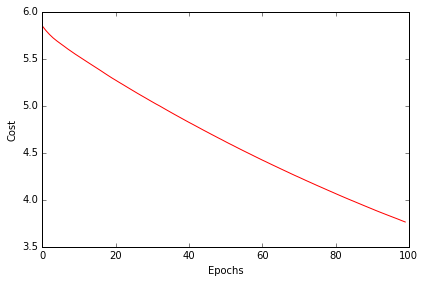

In [87]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

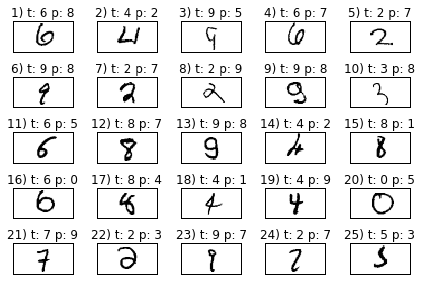

In [88]:
miscl_img = X_test[y_test != yhat][:25]
correct_lab = y_test[y_test != yhat][:25]
miscl_lab = yhat[y_test != yhat][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()